# Assignment-14-Decision Tree-Company

Decision Tree
 
Assignment


About the data:\
Let’s consider a Company dataset with around 10 variables and 400 records. \
The attributes are as follows: \
 Sales -- Unit sales (in thousands) at each location\
 Competitor Price -- Price charged by competitor at each location\
 Income -- Community income level (in thousands of dollars)\
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)\
 Population -- Population size in region (in thousands)\
 Price -- Price company charges for car seats at each site\
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site\
 Age -- Average age of the local population\
 Education -- Education level at each location\
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location\
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not\
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
#load libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('dataset/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [4]:
df[df['Sales']>9]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
380,9.64,106,64,10,17,89,Medium,68,17,Yes,Yes
383,9.35,98,117,0,76,68,Medium,63,10,Yes,No
384,12.85,123,37,15,348,112,Good,28,12,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes


In [5]:
# Convert Sales to Category
criteria = [df['Sales'].between(np.min(df.Sales), 9), df['Sales'].between(9, np.max(df.Sales))]
values = ['low', 'high']
df['Sales'] = np.select(criteria, values, 0)

In [6]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,low,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,low,139,23,3,37,120,Medium,55,11,No,Yes
397,low,162,26,12,368,159,Medium,40,18,Yes,Yes
398,low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        400 non-null    object
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [8]:
# list cateogrical columns
categorical = [col for col in df.columns if df[col].dtype == 'object']
categorical

['Sales', 'ShelveLoc', 'Urban', 'US']

In [9]:
df[categorical].sample(10)

,Sales,ShelveLoc,Urban,US
19,low,Medium,Yes,Yes
241,high,Medium,Yes,No
104,low,Medium,Yes,No
120,low,Medium,Yes,Yes
139,high,Medium,No,Yes
106,low,Medium,No,No
93,low,Medium,Yes,No
31,low,Medium,Yes,Yes
340,low,Bad,Yes,No
148,low,Medium,No,Yes


In [10]:
# frequency counts
for cat in categorical:
    print(df[cat].value_counts())

low     287
high    113
Name: Sales, dtype: int64
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64


In [11]:
#ordinal encoding for ShelveLoc column
scale_mapper = {"Bad":0, "Medium":1, "Good":2}
df["ShelveLoc"] = df["ShelveLoc"].replace(scale_mapper)

In [12]:
# Label Encoding
col=df.columns
def label_encode(dataset,columns):
    for col in columns:
        dataset[col] = LabelEncoder().fit_transform(dataset[col])
    return dataset

label_encode(df,col)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,49,51,11,141,54,0,17,7,1,1
1,0,22,27,16,129,18,2,40,0,1,1
2,0,24,14,10,138,15,1,34,2,1,1
3,1,28,77,4,249,31,1,30,4,1,1
4,1,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,49,85,17,104,62,2,8,4,1,1
396,1,50,2,3,17,54,1,30,1,0,1
397,1,71,5,12,195,91,1,15,8,1,1
398,1,12,57,7,145,29,0,25,2,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int64
 10  US           400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
#Split dataset into training and testing
x_train,x_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 10), (280,), (120, 10), (120,))

### Building Decision Tree Classifier using Entropy Criteria

In [16]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [17]:
def evaluate_model(dt_classifier):
    y_pred_test = dt_classifier.predict(x_test)
    y_pred_train = dt_classifier.predict(x_train)
    
    print("Train Accuracy : {0:0.4f}".format(accuracy_score(y_train, y_pred_train)))
    print("Test Accuracy : {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))
    
    # getting the count of each category
    print("Count of each category:")
    print(pd.Series(y_pred_test).value_counts())
    print("-"*50)
    
    #Classification Report
    print("Classification Report:")
    print(classification_report(y_pred_test,y_test))
    print("-"*50)
    
    #Plotting confusion matrix for Decision Tree
    print("Confusion Matrix:")
    f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

    plot_0 = sns.heatmap((confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap="GnBu",ax=a[0][0]);
    a[0][0].set_title('Training Data')

    plot_1 = sns.heatmap((confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g',cmap="GnBu",ax=a[0][1]);
    a[0][1].set_title('Test Data');

In [18]:
def get_dt_graph(dt_classifier):
    cn=['low','high']
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True)

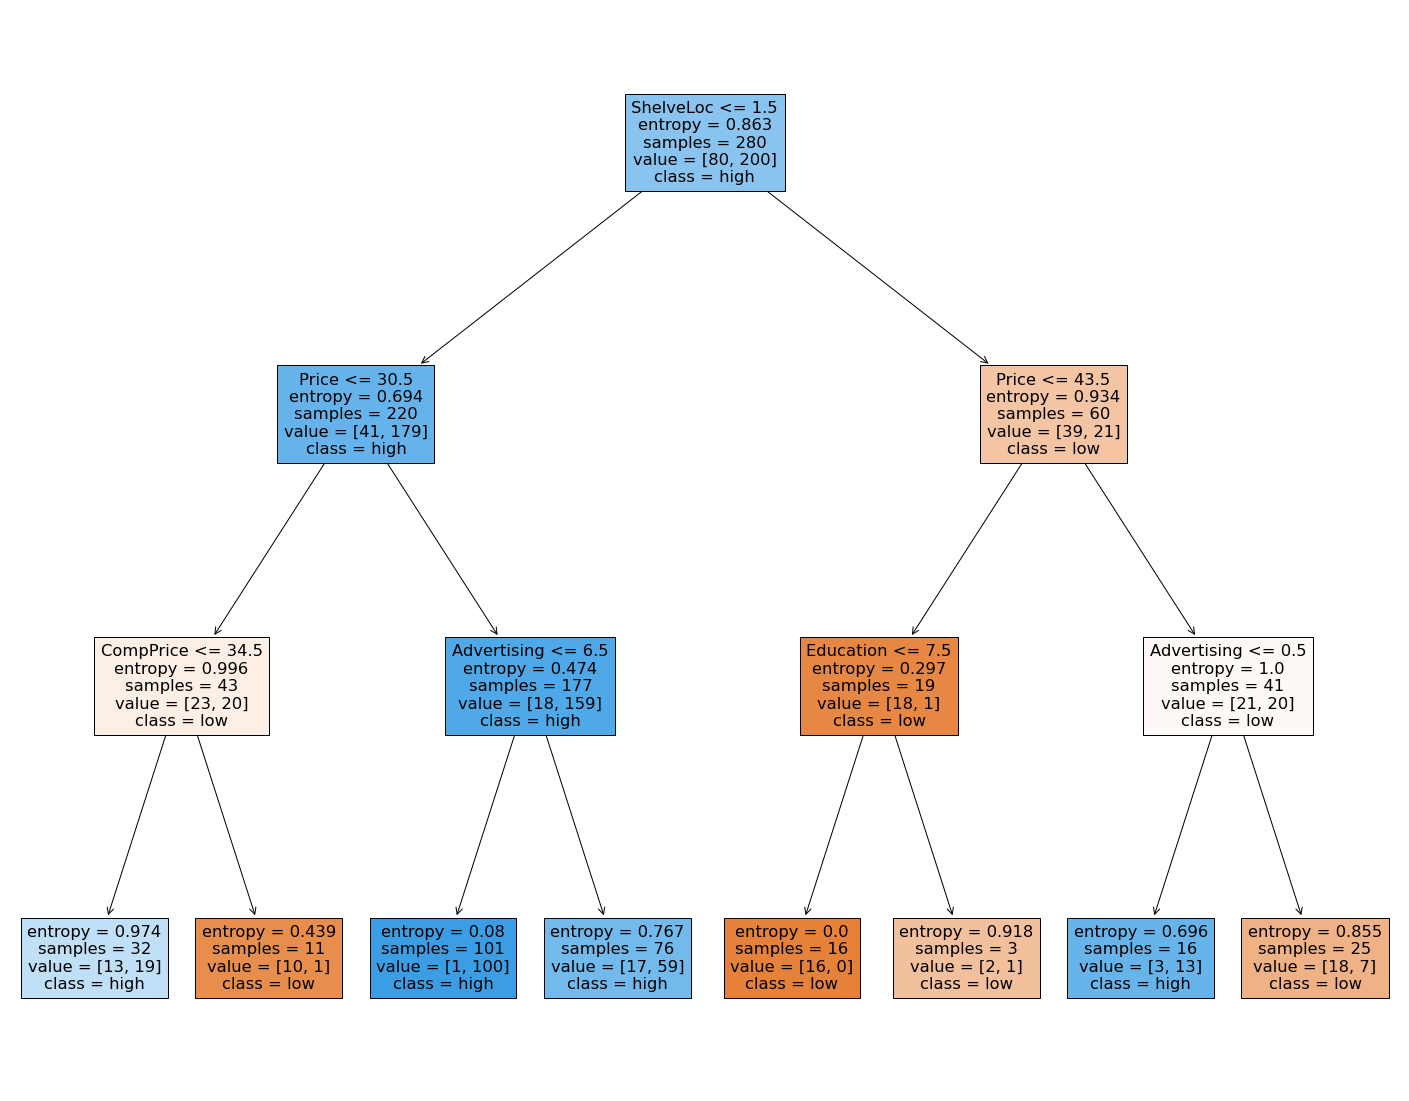

In [19]:
get_dt_graph(dt)

#### Evaluating model performance

Train Accuracy : 0.8464
Test Accuracy : 0.8417
Count of each category:
1    94
0    26
dtype: int64
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        26
           1       0.93      0.86      0.90        94

    accuracy                           0.84       120
   macro avg       0.77      0.82      0.79       120
weighted avg       0.86      0.84      0.85       120

--------------------------------------------------
Confusion Matrix:


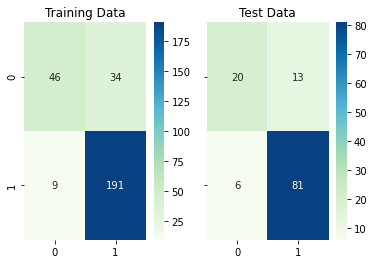

In [20]:
evaluate_model(dt)

### Building Decision Tree Classifier using Gini Index

In [21]:
gdt = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=2)
gdt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

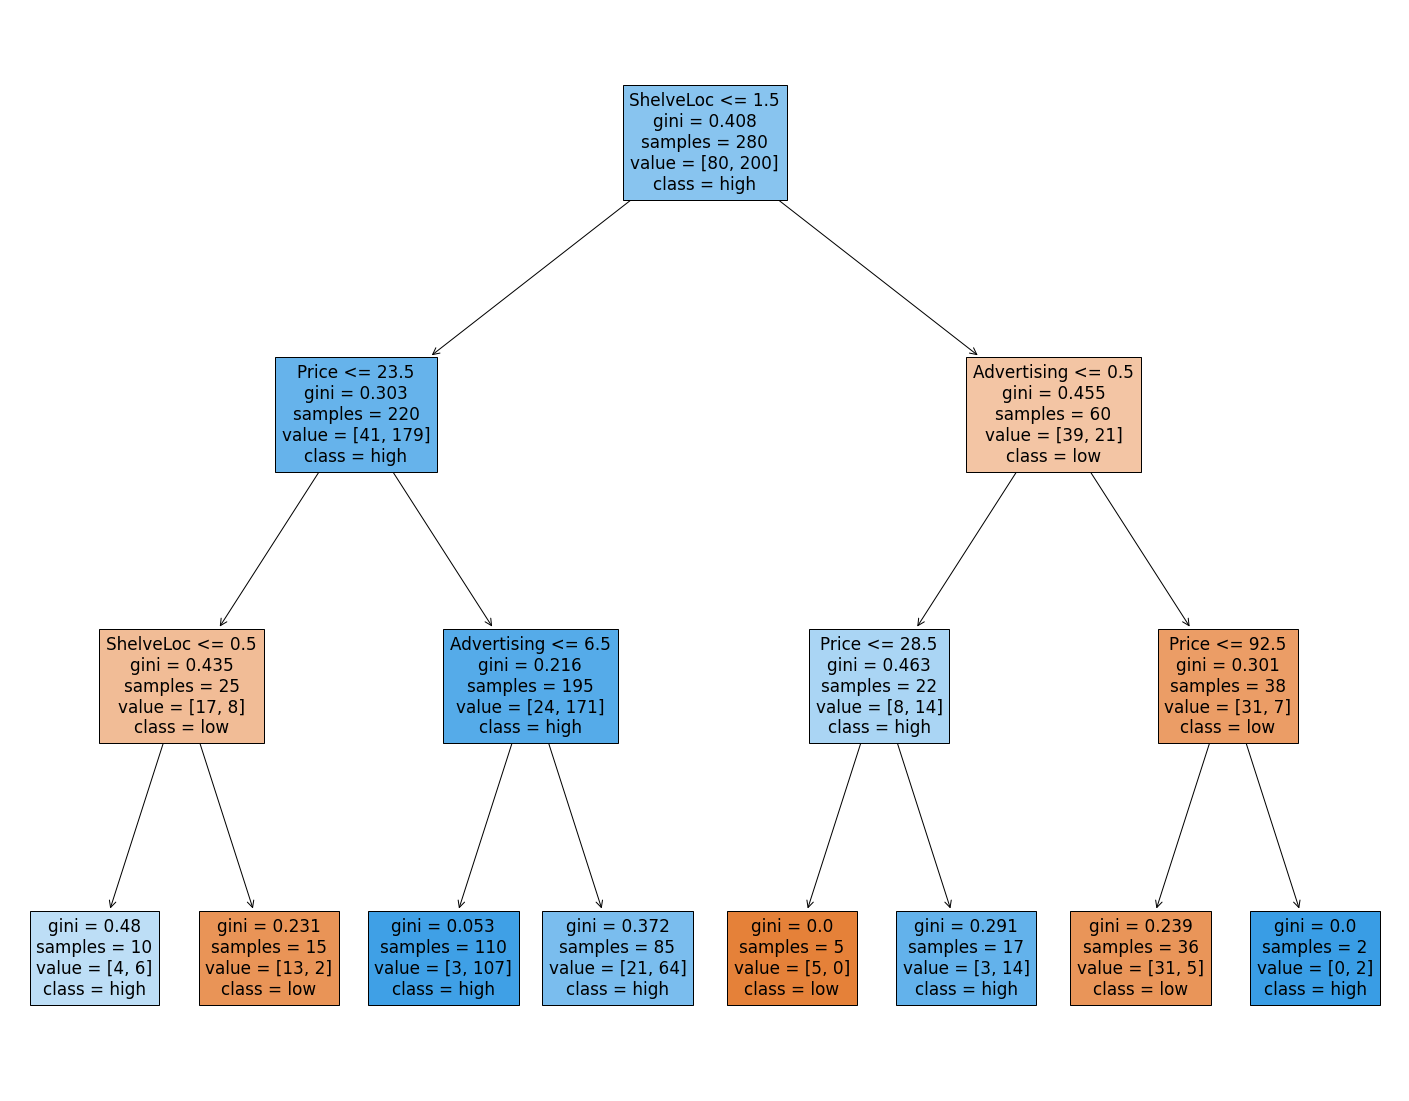

In [22]:
get_dt_graph(gdt)

#### Evaluating model performance

Train Accuracy : 0.8643
Test Accuracy : 0.8333
Count of each category:
1    93
0    27
dtype: int64
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        27
           1       0.92      0.86      0.89        93

    accuracy                           0.83       120
   macro avg       0.76      0.80      0.78       120
weighted avg       0.85      0.83      0.84       120

--------------------------------------------------
Confusion Matrix:


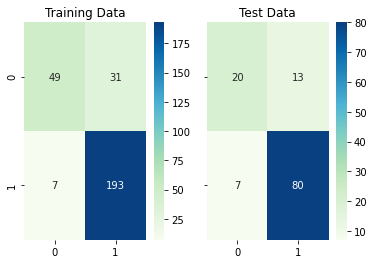

In [23]:
evaluate_model(gdt)

## Hyperparameter Tuning

In [24]:
dt = DecisionTreeClassifier(random_state=2)

In [25]:
#create paramater grid
param_grid = { 
    'max_depth':[2,3,5,8,10,12,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion':['gini','entropy']
}

In [26]:
#Instantiate Grid Search Model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, verbose=3, scoring='accuracy')

In [27]:
%%time
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
CPU times: user 523 ms, sys: 88.7 ms, total: 612 ms
Wall time: 3.7 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 12, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

In [28]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005581,0.000693,0.003420,0.000350,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.821429,0.892857,...,0.857143,0.750000,0.821429,0.821429,0.750000,0.857143,0.642857,0.800000,0.068139,3
1,0.007243,0.003068,0.004923,0.004685,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.821429,0.857143,...,0.857143,0.750000,0.821429,0.821429,0.750000,0.821429,0.642857,0.792857,0.061445,11
2,0.005903,0.001332,0.003796,0.000582,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.785714,0.857143,...,0.857143,0.750000,0.821429,0.785714,0.750000,0.821429,0.678571,0.789286,0.051632,16
3,0.005689,0.001512,0.004156,0.001924,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.821429,0.857143,...,0.785714,0.785714,0.821429,0.750000,0.714286,0.821429,0.714286,0.778571,0.050000,32
4,0.005065,0.000314,0.004091,0.002082,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.714286,0.714286,...,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.714286,0.000000,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.006570,0.001079,0.003349,0.000396,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.785714,0.821429,...,0.821429,0.821429,0.821429,0.678571,0.785714,0.785714,0.750000,0.789286,0.043595,12
66,0.006397,0.001447,0.003451,0.000839,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.785714,0.892857,...,0.785714,0.821429,0.821429,0.678571,0.821429,0.785714,0.642857,0.785714,0.069620,17
67,0.007211,0.001959,0.003690,0.001126,entropy,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.892857,0.821429,...,0.857143,0.750000,0.785714,0.678571,0.785714,0.750000,0.750000,0.785714,0.057588,17
68,0.005443,0.000910,0.003301,0.000471,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.821429,0.857143,...,0.785714,0.785714,0.821429,0.750000,0.714286,0.821429,0.714286,0.778571,0.050000,32


In [29]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.005985,0.002317,0.003923,0.002121,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.892857,0.928571,...,0.821429,0.785714,0.892857,0.750000,0.785714,0.857143,0.714286,0.817857,0.068605,1
6,0.005363,0.000465,0.003203,0.000210,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.892857,0.892857,...,0.857143,0.785714,0.892857,0.750000,0.785714,0.821429,0.642857,0.810714,0.075000,2
0,0.005581,0.000693,0.003420,0.000350,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.821429,0.892857,...,0.857143,0.750000,0.821429,0.821429,0.750000,0.857143,0.642857,0.800000,0.068139,3
41,0.005483,0.000439,0.003793,0.001650,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.857143,0.892857,...,0.821429,0.821429,0.892857,0.678571,0.785714,0.821429,0.642857,0.800000,0.078571,3
11,0.005386,0.000178,0.003160,0.000155,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.821429,0.928571,...,0.821429,0.785714,0.857143,0.642857,0.821429,0.750000,0.714286,0.796429,0.075000,5


In [30]:
dt_best = grid_search.best_estimator_

In [31]:
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2)

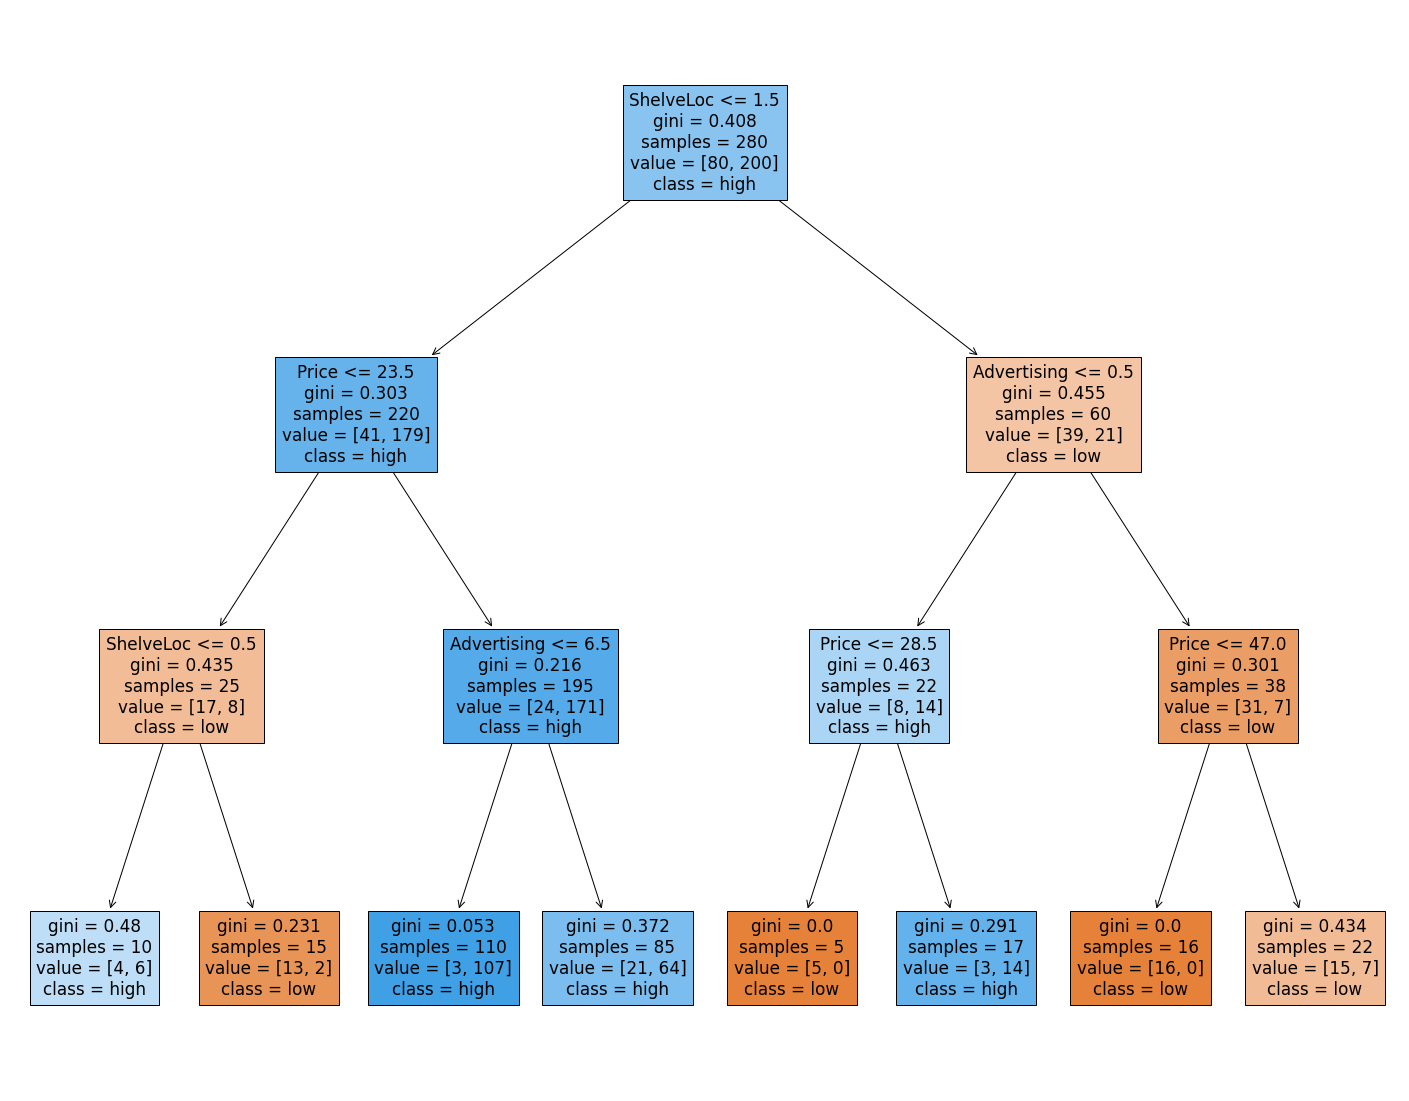

In [32]:
get_dt_graph(dt_best)

Train Accuracy : 0.8571
Test Accuracy : 0.8333
Count of each category:
1    93
0    27
dtype: int64
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        27
           1       0.92      0.86      0.89        93

    accuracy                           0.83       120
   macro avg       0.76      0.80      0.78       120
weighted avg       0.85      0.83      0.84       120

--------------------------------------------------
Confusion Matrix:


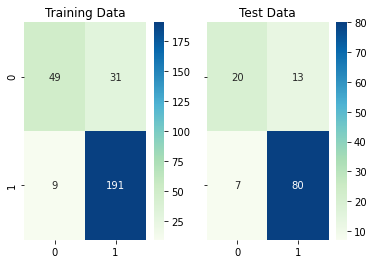

In [33]:
evaluate_model(dt_best)